The **Mean Shift** is a powerful unsupervised learning algorithm that's used to cluster datapoints.
It considers the distribution of datapoints as a probability-density function and tries to
find the *modes* in the feature space. These *modes* are basically points corresponding to local maxima.
The main advantage of Mean Shift algorithm is that we are not required to know the number of
clusters beforehand.

Let's say that we have a set of input points, and we are trying to find clusters in them without
knowing how many clusters we are looking for. Mean Shift algorithm considers these points
to be sampled from a probability density function. If there are clusters in the datapoints,
then they correspond to the peaks of that probability-density function. The algorithm starts
from random points and iteratively converges toward these peaks.  You can learn more about it at
http://homepages.inf.ed.ac.uk/rvf/CVonline/LOCAL_COPIES/TUEZEL1/MeanShift.pdf

In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

import utilities

In [2]:
# Load data from input file
X = utilities.load_data('data_multivar.txt')

In [3]:
# Estimating the bandwidth 
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

In [4]:
# Compute clustering with MeanShift
meanshift_estimator = MeanShift(bandwidth=bandwidth, bin_seeding=True)

# Train the model
meanshift_estimator.fit(X)

# Extract the labels
labels = meanshift_estimator.labels_

# Extract the centroids of the clusters
centroids = meanshift_estimator.cluster_centers_
num_clusters = len(np.unique(labels))

print ("Number of clusters in input data =", num_clusters)

Number of clusters in input data = 4


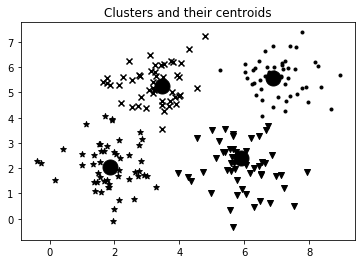

In [5]:
# Plot the points and centroids 

import matplotlib.pyplot as plt
from itertools import cycle

plt.figure()

# specify marker shapes for different clusters
markers = '.*xv'

for i, marker in zip(range(num_clusters), markers):
    # plot the points belong to the current cluster
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='k')

    # plot the centroid of the current cluster
    centroid = centroids[i]
    plt.plot(centroid[0], centroid[1], marker='o', markerfacecolor='k',
             markeredgecolor='k', markersize=15)

plt.title('Clusters and their centroids')
plt.show()
